#https://colab.research.google.com/drive/1qeBwrosOfCNEeDJe8GFQ_wWOUw6gmru8 is the location of the original file.
data set is taken from above link 

In [1]:
import tensorflow.keras as tf
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

#reviewing

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

verify the category assigned to the initial review 

In [3]:
train_labels[0]

max([max(sequence) for sequence in train_data])

9999

"""Decoding and displaying movie reviews in text"""

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

#As can be observed, the label is 1 and the initial review is favorable.

organizing the data

**Multi-hot encoding is used to encode the integer sequences** """

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [6]:
x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

developing the model

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
# #Here I am  using two hidden layers, each with 16 nodes, and only one node in the output layer for either +ve or -ve output. ReLu is used for hidden.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [8]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20


30/30 [==============================] - 2s 33ms/step - loss: 0.5318 - accuracy: 0.7719 - val_loss: 0.3795 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2827 - accuracy: 0.9071 - val_loss: 0.2894 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1918 - accuracy: 0.9380 - val_loss: 0.2754 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1401 - accuracy: 0.9585 - val_loss: 0.2844 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1041 - accuracy: 0.9715 - val_loss: 0.3066 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0781 - accuracy: 0.9819 - val_loss: 0.3346 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0566 - accuracy: 0.9895 - val_loss: 0.3644 - val_accuracy: 0.8774
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

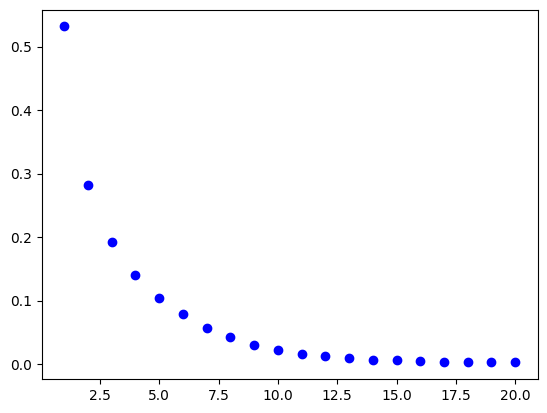

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")


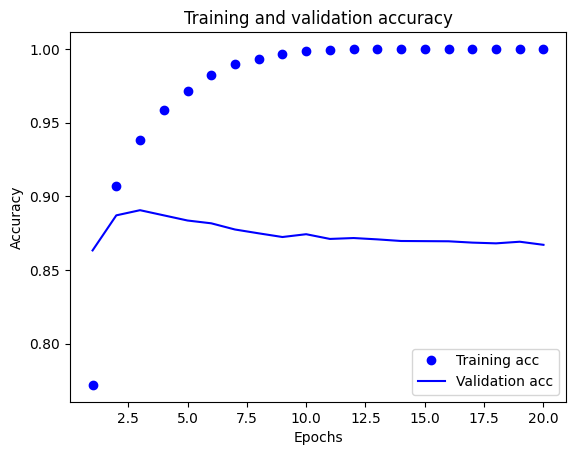

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

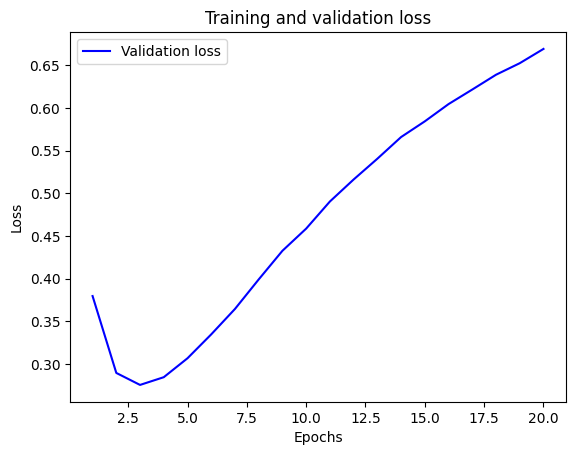

In [13]:
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Here i am using three epochs to retrain the model here.
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4937 - accuracy: 0.7709
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2549 - accuracy: 0.9124
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1865 - accuracy: 0.9361
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3060 - accuracy: 0.8808


[0.3060041666030884, 0.880840003490448]

In [15]:
model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [16]:
model1_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
history1_1 = model1_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history1_3 = model1_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5452 - accuracy: 0.7723 - val_loss: 0.4134 - val_accuracy: 0.8533
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3295 - accuracy: 0.8937 - val_loss: 0.3249 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2496 - accuracy: 0.9221 - val_loss: 0.2950 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2055 - accuracy: 0.9355 - val_loss: 0.2828 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1737 - accuracy: 0.9491 - val_loss: 0.2789 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1497 - accuracy: 0.9577 - val_loss: 0.2780 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1299 - accuracy: 0.9651 - val_loss: 0.2828 - val_accuracy: 0.8864
Epoch 8/20
30/

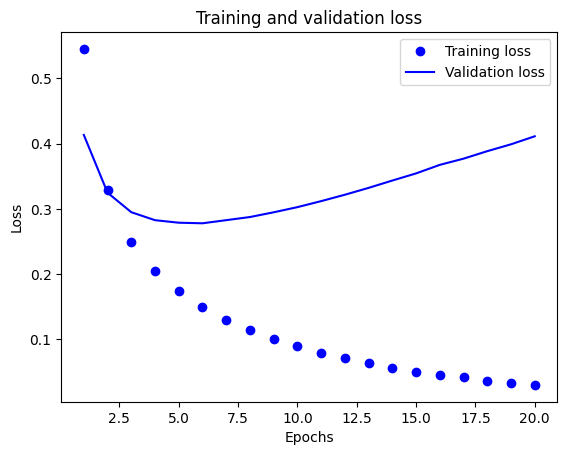

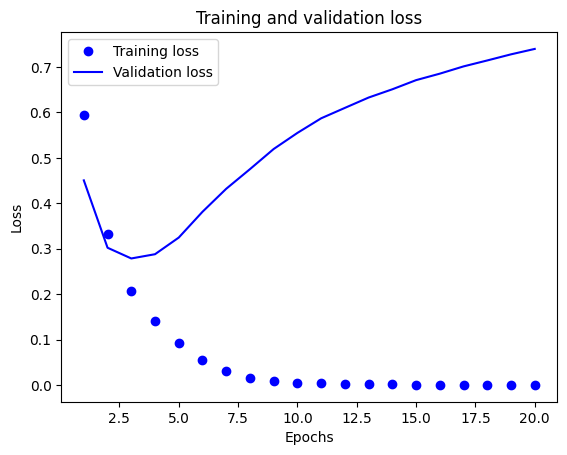

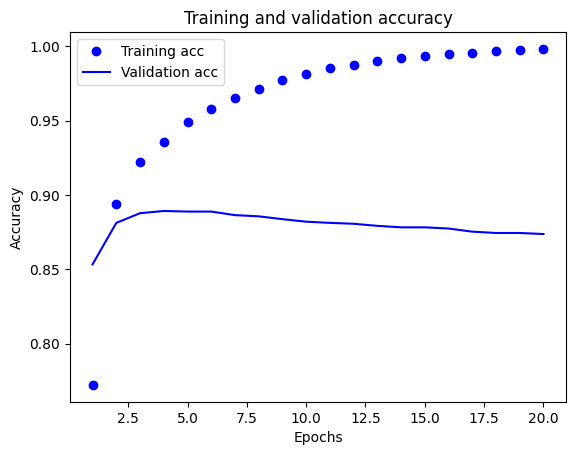

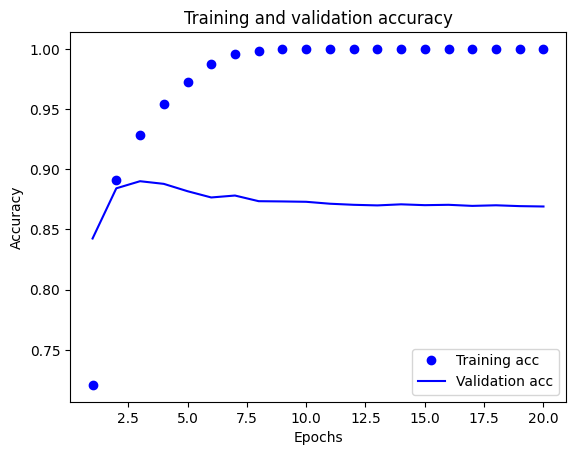

In [19]:

historyp1_1 = history1_1.history
historyp1_1.keys()

historyp1_3 = history1_1.history
historyp1_3.keys()

historyp1_1 = history1_1.history
loss_values1 = historyp1_1["loss"]
val_loss_values1 = historyp1_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

historyp1_3 = history1_3.history
loss_values3 = historyp1_3["loss"]
val_loss_values3 = historyp1_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc1 = historyp1_1["accuracy"]
val_acc1 = historyp1_1["val_accuracy"]
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.clf()
acc3 = historyp1_3["accuracy"]
val_acc3 = historyp1_3["val_accuracy"]
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5169 - accuracy: 0.7781 - val_loss: 0.3344 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2345 - accuracy: 0.9138 - val_loss: 0.2836 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1482 - accuracy: 0.9492 - val_loss: 0.2905 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0981 - accuracy: 0.9703 - val_loss: 0.3230 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0646 - accuracy: 0.9839 - val_loss: 0.3659 - val_accuracy: 0.8774
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0409 - accuracy: 0.9917 - val_loss: 0.4159 - val_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0257 - accuracy: 0.9965 - val_loss: 0.4736 - val_accuracy: 0.8741
Epoch 8/20
30

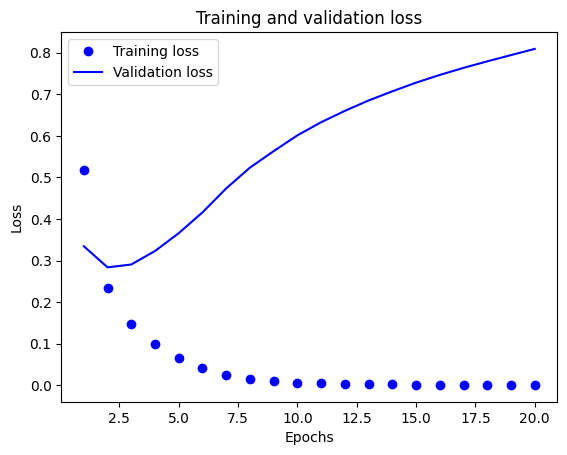

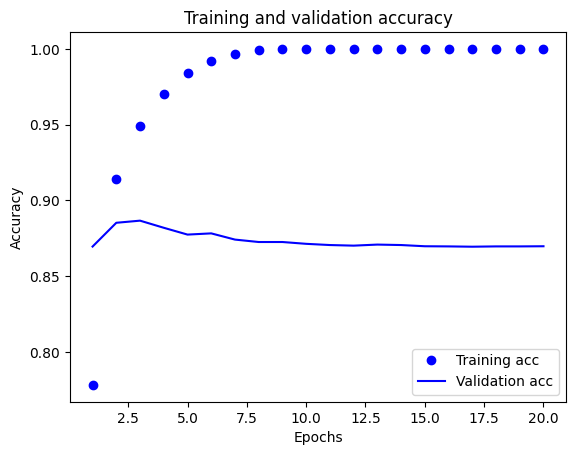

In [20]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp2 = hist2.history
loss_values = histp2["loss"]
val_loss_values = histp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp2["accuracy"]
val_acc = histp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

making use of binary_crossentropy in place of the MSE loss function

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.1967 - accuracy: 0.7573 - val_loss: 0.1387 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0990 - accuracy: 0.9030 - val_loss: 0.0948 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0626 - accuracy: 0.9316 - val_loss: 0.0855 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0450 - accuracy: 0.9553 - val_loss: 0.0836 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.9687 - val_loss: 0.0853 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0256 - accuracy: 0.9799 - val_loss: 0.0868 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.9859 - val_loss: 0.0897 - val_accuracy: 0.8777
Epoch 8/20
30/3

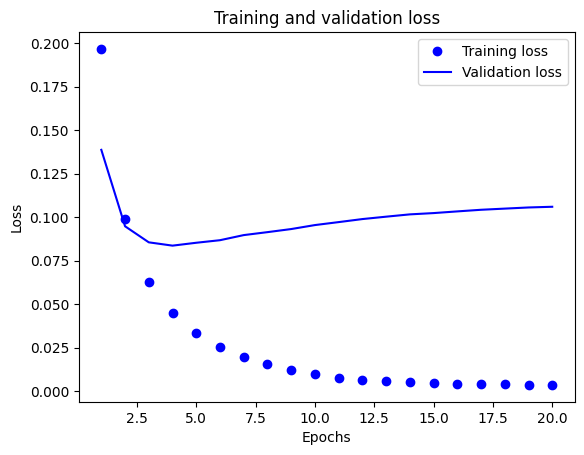

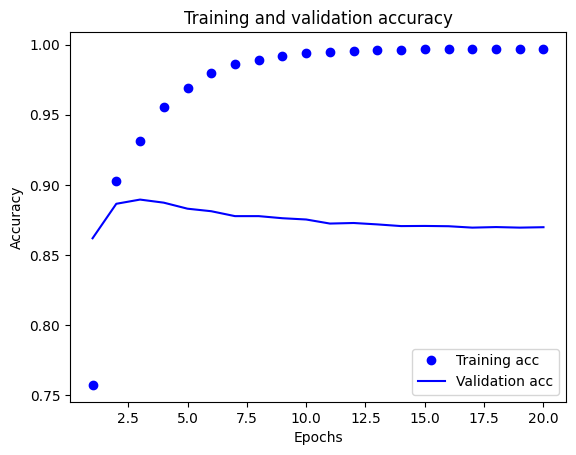

In [22]:
model3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp3 = hist3.history
loss_values = histp3["loss"]
val_loss_values = histp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp3["accuracy"]
val_acc = histp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

insted of relu, using tanh activation

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.1592 - accuracy: 0.8021 - val_loss: 0.1084 - val_accuracy: 0.8644
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0753 - accuracy: 0.9116 - val_loss: 0.0867 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0494 - accuracy: 0.9453 - val_loss: 0.0834 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0356 - accuracy: 0.9653 - val_loss: 0.0848 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0259 - accuracy: 0.9765 - val_loss: 0.0878 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0193 - accuracy: 0.9848 - val_loss: 0.0909 - val_accuracy: 0.8776
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.9894 - val_loss: 0.0938 - val_accuracy: 0.8748
Epoch 8/20
30/

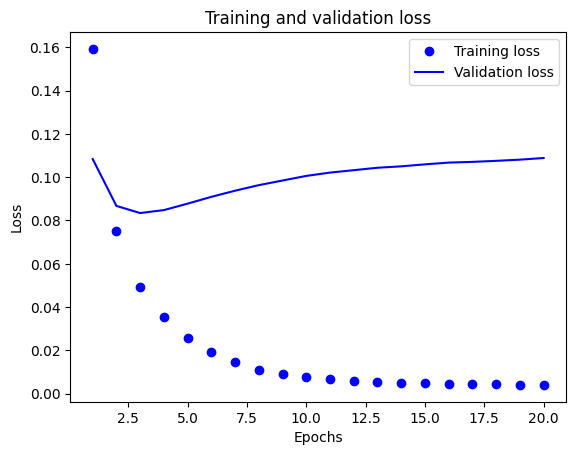

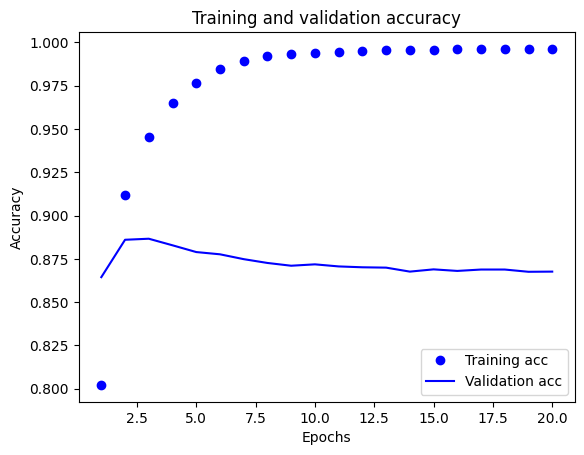

In [23]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp4 = hist4.history
loss_values = histp4["loss"]
val_loss_values = histp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp4["accuracy"]
val_acc = histp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

using dropout technique in the network 

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.6205 - accuracy: 0.6779 - val_loss: 0.4868 - val_accuracy: 0.8295
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4376 - accuracy: 0.8258 - val_loss: 0.3519 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3315 - accuracy: 0.8775 - val_loss: 0.2971 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2676 - accuracy: 0.9051 - val_loss: 0.2759 - val_accuracy: 0.8924
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2246 - accuracy: 0.9255 - val_loss: 0.2699 - val_accuracy: 0.8917
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1930 - accuracy: 0.9359 - val_loss: 0.2703 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1615 - accuracy: 0.9463 - val_loss: 0.2784 - val_accuracy: 0.8893
Epoch 8/20
30

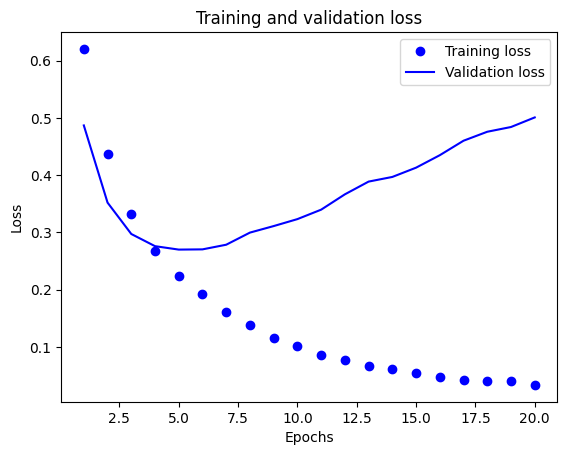

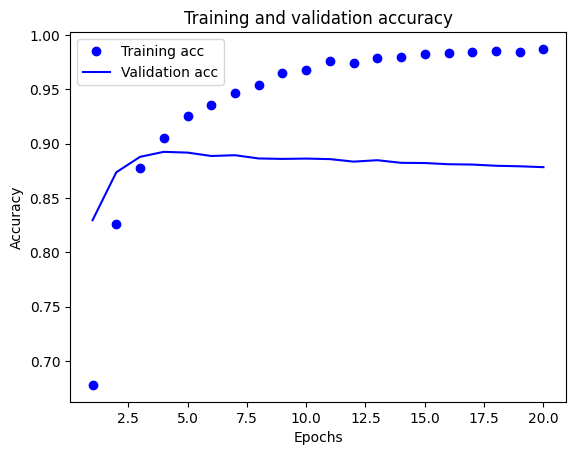

In [25]:
import matplotlib.pyplot as plt
histp5 = hist5.history
loss_values = histp5["loss"]
val_loss_values = histp5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp5["accuracy"]
val_acc = histp5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()